# Assignment 2 - Question 4

In [1]:
# importing the libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Training data of 24 shades of colors
colors = np.zeros((24,3))

#red shades

colors[0,:] = [220,20,60] # crimson
colors[1,:] = [255,0,0] # red
colors[2,:] = [139,0,0] # dark red
colors[3,:] = [205,92,92] # indian red

#green shades

colors[4,:] = [0,128,0] # green
colors[5,:] = [34,139,34] # forest green
colors[6,:] = [50,205,50] # lime green
colors[7,:] = [144,238,144] # light green

#yellow shades

colors[12,:] = [255,255,0] # yellow
colors[13,:] = [255,215,0] # gold
colors[14,:] = [218,165,32] # golden rod
colors[15,:] = [238,232,170] # pale golden rod

#Blue shades

colors[8,:] = [0,0,139] # dark blue
colors[9,:] = [0,0,255] # blue
colors[10,:] = [0,191,255] # deep sky blue
colors[11,:] = [173,216,230] # light blue

#Shades of Teal

colors[16,:] = [0,128,128] # teal
colors[17,:] = [64,224,208] # turquoise
colors[18,:] = [0,255,255] # aqua
colors[19,:] = [224,255,255] # light cyan

#Shades of Pink

colors[20,:] = [255,192,203] # pink
colors[21,:] = [255,105,180] # hot pink
colors[22,:] = [255,182,193] # light pink
colors[23,:] = [255,20,147] # deep pink

#Normalizing the colors array so that the values will be between 0 and 1

colors= colors/255
colors

array([[0.8627451 , 0.07843137, 0.23529412],
       [1.        , 0.        , 0.        ],
       [0.54509804, 0.        , 0.        ],
       [0.80392157, 0.36078431, 0.36078431],
       [0.        , 0.50196078, 0.        ],
       [0.13333333, 0.54509804, 0.13333333],
       [0.19607843, 0.80392157, 0.19607843],
       [0.56470588, 0.93333333, 0.56470588],
       [0.        , 0.        , 0.54509804],
       [0.        , 0.        , 1.        ],
       [0.        , 0.74901961, 1.        ],
       [0.67843137, 0.84705882, 0.90196078],
       [1.        , 1.        , 0.        ],
       [1.        , 0.84313725, 0.        ],
       [0.85490196, 0.64705882, 0.1254902 ],
       [0.93333333, 0.90980392, 0.66666667],
       [0.        , 0.50196078, 0.50196078],
       [0.25098039, 0.87843137, 0.81568627],
       [0.        , 1.        , 1.        ],
       [0.87843137, 1.        , 1.        ],
       [1.        , 0.75294118, 0.79607843],
       [1.        , 0.41176471, 0.70588235],
       [1.

In [3]:
# Random initialization of weights before we start with the learning process

def weight_initialization(w):
  weights = np.empty([w*w,3]) 
  for i in range(0,w*w):
    for j in (0,1,2):
      weights[i][j] = np.random.randint(0,256)/255
  return weights

def output_initialization(w):
  output = np.zeros((w*w,2))
  k=0
  for i in range(w):
    for j in range(w):
      output[k,:] = [i,j]
      k = k+1
  return output

In [4]:
# the initial weights for w=100
weights =weight_initialization(100)
output = output_initialization(100)

In [5]:
# Functions for finding the winning neurons by finding the minimum distance from the array of distances 
# returned by the 'distance' function
def winner(x,w):
  dist = distance(x,weights) 
  winner_index = dist.argmin()
  return winner_index

In [6]:
# functions to calculate the distance between two neurons
def distance(x, weights):
  distance = []
  for w in weights:
    d = np.linalg.norm(x-w)
    distance.append(d)
  return np.array(distance)

A competitive learning process adjusts the weight values of neurons to make them seem like "winning" neurons in the surrounding area. The final map is built up of clusters of comparable neurons as a result of this process.

Instead of updating the winning Neuron’s weight only the neighbours’ weights are updated as well. Closer neighbours are rewarded more than the ones that are farther as per the below formula

$\ N_{ij}(𝑘) = exp{\frac{-d_{ij}^2}{2𝜎^2(𝑘)}}$

In [7]:
# Weight update using competative learning technique

def update_weights(lr,sigma,x,w):
    weights_new = np.empty([10000,3])
    i = winner(x, w)   
    distance1 = np.ceil(i / 100)
    distance2 = np.mod(i , 100)
    dist = distance(np.array([distance1, distance2]), output)     
    s = np.argmin(dist)

    for j in range(0,len(weights)):
      h = np.exp(-dist[j]*dist[j]/(2 * sigma **2))
      #print(h)     
      weights[j] = w[j] + lr*h * (x - w[j])
    return weights


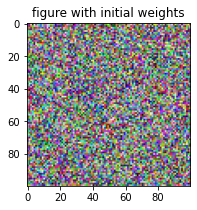

In [8]:
# generate a figure of the original grid (random weights)
weights_initial =weight_initialization(100)
weights_initial = weights_initial.reshape(100,100,3)
plt.figure(figsize=(3, 3))
plt.title('figure with initial weights')
plt.imshow(weights_initial)

The above is the figure with the initial weights, so the colour look scattered or randomly placed

The Kohonen’s Self-Organizing Network (KSON) belongs to the class of unsupervised learning networks, where weights update need not performance feedback from a teacher or a network trainer
The learning here permits the clustering of input data into a smaller set of elements having similar characteristics (features).
It is based on the competitive learning technique also known as the 'winner' takes all strategy.

The learning rate and the neighborhood are decreased at every iteration according to an appropriate scheme
Kohonen suggested a shrinking function in the form of α(k) = α(0)(1 − k/T ), with T being the total number of training cycles and α(0) the starting learning rate bounded by one

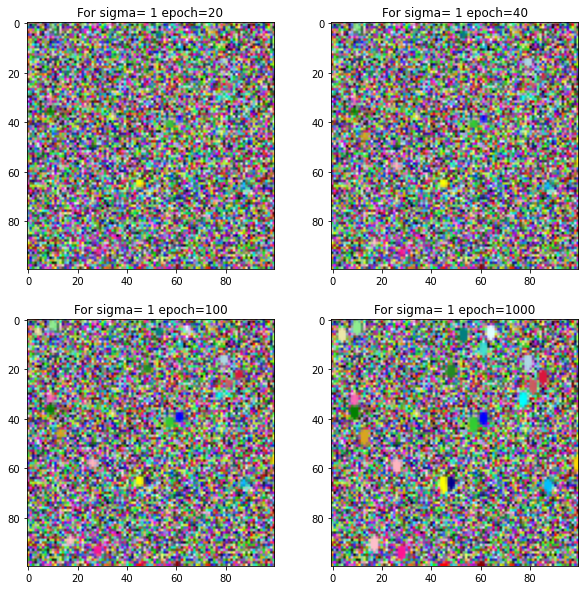

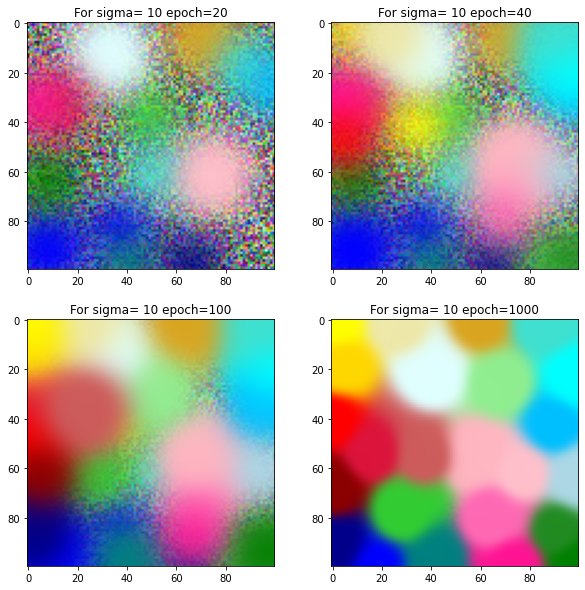

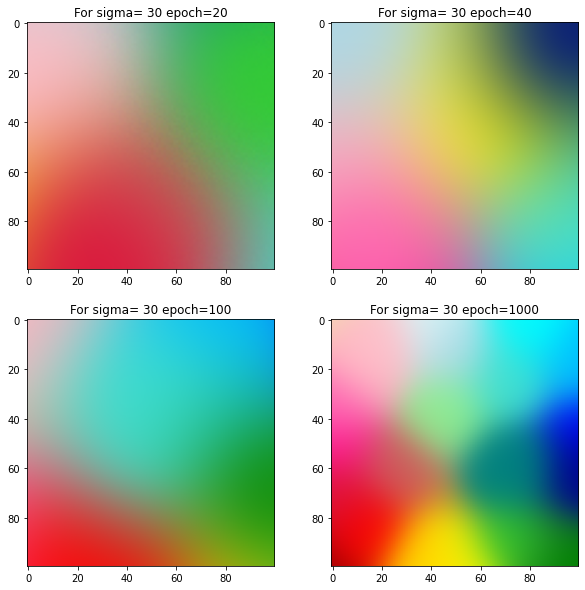

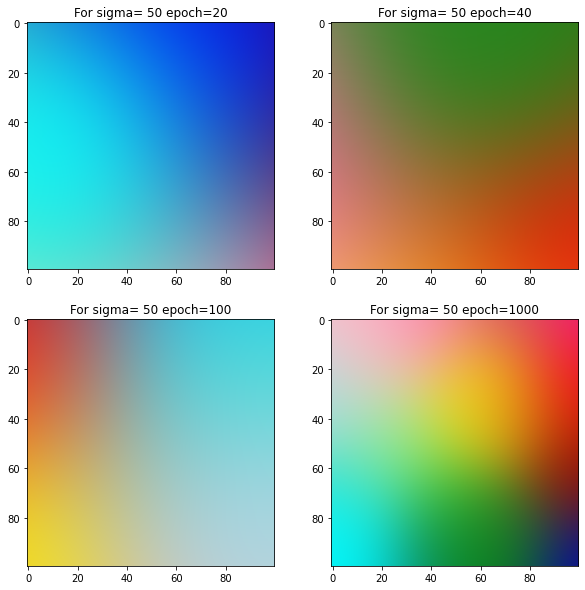

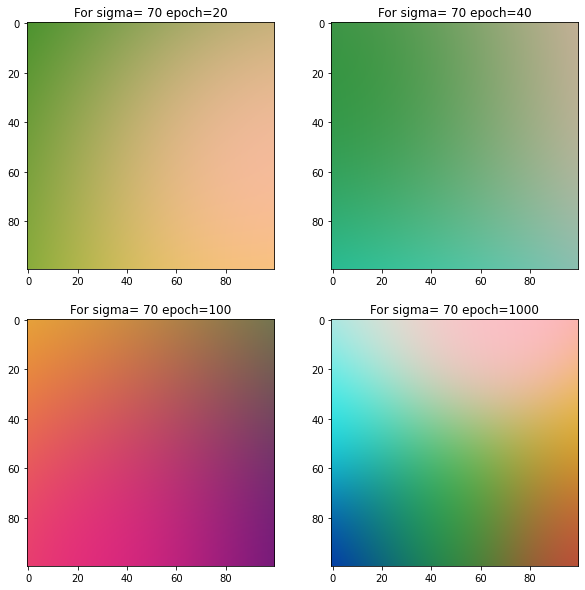

In [9]:
# updating the weights using KSOM technique for differnt sigmas and epochs

sigmas=[1, 10, 30, 50, 70]

for sigma in sigmas:
    T=1000
    lr_0=0.8
    lr=lr_0
    sigma_0=sigma
    sig=sigma
    initial_array=np.zeros((10000,3))
    weights_20=initial_array.copy()
    weights_40=initial_array.copy()
    weights_100=initial_array.copy()
    weights_1000=initial_array.copy()
    weights=weight_initialization(100)
    for n in range(0,T):
    
        i = np.random.randint(0,24)
        weights = update_weights(lr,sig,colors[i],weights)
        
        # learning rate decay and sigma decay
        lr = lr_0* np.exp(-n/T)
        sig = sigma_0*np.exp(-n/T)
        if (n==19):
              weights_20 = weights.copy()
        if (n==39):
              weights_40 = weights.copy()
        if (n==99):
              weights_100 = weights.copy()
        if (n==999):
              weights_1000 = weights.copy()
    weights_20=weights_20.reshape(100,100,3)
    weights_40=weights_40.reshape(100,100,3)
    weights_100=weights_100.reshape(100,100,3)
    weights_1000=weights_1000.reshape(100,100,3)
    
    # printing weights of the matrix at desired epochs and sigmas
    plt.figure(figsize=(10,10))
    plt.title('For sigma= '+str(sigma)+' epoch=1' )

    plt.subplot(221)
    plt.title('For sigma= '+str(sigma)+' epoch=20')
    plt.imshow(weights_20)

    plt.subplot(222)
    plt.title('For sigma= '+str(sigma)+' epoch=40')
    plt.imshow(weights_40)

    plt.subplot(223)
    plt.title('For sigma= '+str(sigma)+' epoch=100')
    plt.imshow(weights_100)

    plt.subplot(224)
    plt.title('For sigma= '+str(sigma)+' epoch=1000')
    plt.imshow(weights_1000)

## Conclusion on the Effects of Sigma and epoch

As we increase the sigma value the neighbourhood size decreases.

Sigma = 1
- epoch 20: There is no much difference from the image with initial weights.
- epoch 40: There is no much difference from the image with initial weights, the image looks same as for epoch 20.
- epoch 100: There are about 10 clusters but since the boundries are not clearly and there is also a lot of over lap which makes the clusters not clearly visible.
- epoch 1000: The are 23 visible clusters in the image but the colours are still scattered.

Sigma = 10
- epoch 20: The clusters are clearly visible but there is some noise and the boundries are not cleary defined.
- epoch 40: The clusters are clearly visible than epoch 20 but there is still some noise and the boundries are not cleary defined.
- epoch 100: The intensity of the clusters has increased but the blobs does not have distinct boundries.
- epoch 1000: The clusters are represented smoothy and the boundries are well defined.

Sigma = 30
- epoch 20: The colurs overlaps and and merges with other colours. The boundries are not distinct.
- epoch 40: The colurs bend into another colour making only a few colur visible.
- epoch 100: The colurs bend into another colour making only a few colur visible.
- epoch 1000: The colurs overlaps but we can distinguish the boundries.

Sigma = 50
- epoch 20: The colour clusters merge together to create a gradient effect. 
- epoch 40: The colour clusters merge together to create a gradient effect. Individual colour clusters grow more apparent.
- epoch 100: The colour clusters merge together to create a gradient effect. Individual colour clusters grow more apparent.
- epoch 1000: The colurs overlaps and only a few colours are visible. But we can distinguish the boundries.

Sigma = 70
- epoch 20: The colour clusters merge together to create a gradient effect. Individual colour clusters grow more apparent.
- epoch 40: The colour clusters merge together to create a gradient effect. Individual colour clusters grow more apparent.
- epoch 100: The colour clusters merge together to create a gradient effect. Individual colour clusters grow more apparent.
- epoch 1000: The colurs bends over another colur making the image look blur but we can indentify one colour over the others.

The clusters do not converge adequately when sigma is too tiny. When sigma is too big, the network may map input to too few dimensions, causing network neurons to map inputs indistinguishably since each neuron learns properties of multiple inputs due to the huge neighbourhood size employed for updating them.

There exist a relationship between the KSOM's learning and the sigma and the epoch. We can clearly see that maximum learning is obtained at epoch= 1000. At the epochs 20 and 40 the output is not close to the required output. But when the epoch increases to 100 the clusters are better visible and when the epoch is 1000 the boundries are distinguishable and clearly visible.
When we increase sigma more there 20 the colours overlap because there are convering to their parent colour which results in the loss of information. As the number of epochs rises, the model's level of convergence increases until it can no longer converge or change becomes irrelevant. To ensure convergence, it's a good idea to train the model across a sufficient number of epochs.

We have the best clustering at sigma=10 and epoch= 1000. Since the learning of KSOM depends heavily on sigma and epoch,they must be chosen appropriately to get the best convergence.